#importation

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [22]:
data = pd.read_excel('/content/fichier_svm.xlsx',engine='openpyxl')

In [23]:
data.isnull().sum()

Gender                                     0
Age                                        5
Education                                  0
Work                                       0
Cardiac_Arrest_Admission                   0
Non_Cardiac_Condition                      0
Hypertension                               1
Dyslipidemia                               1
DM                                         1
Year_DM_Diagnosed                       2068
DM_Duration                             1986
DM_Type                                 1881
DM_Treatment                            1882
Smoking_History                            2
Waist                                     92
BMI                                       60
Fasting_Blood_Glucose_Value_SI_Units    1285
HbA1C_Admission_Value                   1495
Lipid_24_Collected                         3
Cholesterol_Value_SI_Units               330
Triglycerides_Value_SI_Units             370
Creatinine_Clearance                      65
Heart_Rate

In [24]:
pd.set_option('display.max_row', 24)
pd.set_option('display.max_column', 24)

In [25]:
data = data.dropna(subset=['DM'])

In [26]:
X=data.drop('DM',axis=1)
y=data['DM']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
data.head()

,Gender,Age,Education,Work,Cardiac_Arrest_Admission,Non_Cardiac_Condition,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment,Smoking_History,Waist,BMI,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Lipid_24_Collected,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,Creatinine_Clearance,Heart_Rate
1,0,52.0,4,2,0,0,1.0,1.0,1.0,NaN,10.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,73.0,1,0,0,0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,60.0,20.00,7.00,NaN,1.0,5.38,1.85,24.12,75.0
3,1,64.0,2,0,0,0,1.0,1.0,1.0,2002.0,10.0,2.0,1.0,3.0,85.0,33.29,11.93,NaN,1.0,5.40,2.24,63.60,117.0
4,1,56.0,1,0,0,0,0.0,1.0,1.0,1988.0,24.0,2.0,2.0,3.0,85.0,31.22,4.40,7.1,0.0,4.70,1.30,114.24,82.0
5,1,78.0,1,0,0,0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,90.0,19.56,6.20,5.6,0.0,4.11,1.11,27.55,90.0


#Passons à l'action

##Arbitary imputer

In [27]:
features_to_fill = ['Year_DM_Diagnosed', 'DM_Duration', 'DM_Type', 'DM_Treatment']

for feature in features_to_fill:
        if pd.isnull(data[feature]).any():
            data.loc[data['DM'] == 0, feature] = -99


print(data)
data.head(29)

      Gender   Age  Education  Work  Cardiac_Arrest_Admission  \
1          0  52.0          4     2                         0   
2          1  73.0          1     0                         0   
3          1  64.0          2     0                         0   
4          1  56.0          1     0                         0   
5          1  78.0          1     0                         0   
...      ...   ...        ...   ...                       ...   
4052       0  75.0          0     0                         0   
4053       0  56.0          1     0                         1   
4054       0  55.0          2     0                         0   
4055       0  77.0          0     0                         0   
4056       0  73.0          0     0                         0   

      Non_Cardiac_Condition  Hypertension  Dyslipidemia   DM  \
1                         0           1.0           1.0  1.0   
2                         0           1.0           1.0  0.0   
3                         0

,Gender,Age,Education,Work,Cardiac_Arrest_Admission,Non_Cardiac_Condition,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment,Smoking_History,Waist,BMI,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Lipid_24_Collected,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,Creatinine_Clearance,Heart_Rate
1,0,52.0,4,2,0,0,1.0,1.0,1.0,NaN,10.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,73.0,1,0,0,0,1.0,1.0,0.0,-99.0,-99.0,-99.0,-99.0,0.0,60.0,20.00,7.00,NaN,1.0,5.38,1.85,24.12,75.0
3,1,64.0,2,0,0,0,1.0,1.0,1.0,2002.0,10.0,2.0,1.0,3.0,85.0,33.29,11.93,NaN,1.0,5.40,2.24,63.60,117.0
4,1,56.0,1,0,0,0,0.0,1.0,1.0,1988.0,24.0,2.0,2.0,3.0,85.0,31.22,4.40,7.1,0.0,4.70,1.30,114.24,82.0
5,1,78.0,1,0,0,0,1.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,3.0,90.0,19.56,6.20,5.6,0.0,4.11,1.11,27.55,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1,67.0,0,0,0,0,1.0,0.0,1.0,2003.0,9.0,2.0,3.0,3.0,104.0,31.98,NaN,7.1,0.0,NaN,NaN,41.46,126.0
26,0,73.0,0,0,0,0,1.0,1.0,1.0,2000.0,12.0,2.0,3.0,3.0,78.0,27.99,NaN,NaN,1.0,3.90,1.30,83.47,71.0
27,1,79.0,0,0,0,1,1.0,1.0,0.0,-99.0,-99.0,-99.0,-99.0,2.0,90.0,29.14,10.10,4.0,1.0,5.00,0.60,57.67,98.0
28,0,57.0,0,2,0,0,1.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,0.0,120.0,29.98,NaN,NaN,1.0,5.20,1.90,107.76,113.0


In [28]:
data.isnull().sum()

Gender                                     0
Age                                        5
Education                                  0
Work                                       0
Cardiac_Arrest_Admission                   0
Non_Cardiac_Condition                      0
Hypertension                               0
Dyslipidemia                               0
DM                                         0
Year_DM_Diagnosed                        373
DM_Duration                              291
DM_Type                                  186
DM_Treatment                             187
Smoking_History                            1
Waist                                     91
BMI                                       59
Fasting_Blood_Glucose_Value_SI_Units    1284
HbA1C_Admission_Value                   1494
Lipid_24_Collected                         2
Cholesterol_Value_SI_Units               329
Triglycerides_Value_SI_Units             369
Creatinine_Clearance                      64
Heart_Rate

In [29]:
data.corr()

,Gender,Age,Education,Work,Cardiac_Arrest_Admission,Non_Cardiac_Condition,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment,Smoking_History,Waist,BMI,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Lipid_24_Collected,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,Creatinine_Clearance,Heart_Rate
Gender,1.000000,0.157629,-0.307581,-0.372193,-0.014271,0.008588,0.208488,0.122161,0.142739,0.160234,0.156157,0.158402,0.156728,0.404810,0.035130,0.137678,0.056730,0.104537,-0.067571,0.032607,-0.008419,-0.075261,0.111346
Age,0.157629,1.000000,-0.430319,-0.543144,-0.005374,0.096070,0.262420,0.123644,0.102808,0.108997,0.116608,0.114404,0.114002,0.287365,-0.093032,-0.108084,0.040849,-0.010242,-0.081520,-0.001863,-0.136520,-0.513887,0.051306
Education,-0.307581,-0.430319,1.000000,0.507727,-0.006801,-0.036820,-0.148619,-0.005787,-0.071660,-0.079103,-0.081927,-0.075926,-0.074726,-0.292509,0.025400,0.059603,-0.057767,-0.057771,0.012231,-0.011421,0.097803,0.289530,-0.043145
Work,-0.372193,-0.543144,0.507727,1.000000,0.000245,-0.067247,-0.233670,-0.108356,-0.134953,-0.150278,-0.148917,-0.149505,-0.148240,-0.299841,0.028411,0.021105,-0.047990,-0.051575,0.056474,0.002409,0.088039,0.325642,-0.059656
Cardiac_Arrest_Admission,-0.014271,-0.005374,-0.006801,0.000245,1.000000,0.069662,-0.005582,-0.035115,-0.008968,-0.004623,-0.007841,-0.007484,-0.006470,-0.023887,-0.017223,-0.015263,0.009861,-0.007010,-0.038460,-0.003303,-0.002018,-0.030030,0.076651
Non_Cardiac_Condition,0.008588,0.096070,-0.036820,-0.067247,0.069662,1.000000,0.056959,0.013948,0.032100,0.038202,0.036010,0.037390,0.037612,-0.006712,-0.020851,-0.018219,0.014469,-0.009896,-0.034294,-0.011748,-0.021782,-0.132824,0.127163
Hypertension,0.208488,0.262420,-0.148619,-0.233670,-0.005582,0.056959,1.000000,0.394861,0.298039,0.327745,0.293963,0.329938,0.328806,0.184140,0.080925,0.061501,0.061745,0.128285,-0.007910,0.000057,0.019697,-0.182463,0.086385
Dyslipidemia,0.122161,0.123644,-0.005787,-0.108356,-0.035115,0.013948,0.394861,1.000000,0.293843,0.320859,0.268327,0.323560,0.322384,0.100580,0.076415,0.052766,0.030594,0.136342,0.014109,0.011138,0.072922,-0.068534,0.018657
DM,0.142739,0.102808,-0.071660,-0.134953,-0.008968,0.032100,0.298039,0.293843,1.000000,0.999493,0.860121,0.999999,0.999659,0.108513,0.119881,0.066603,0.245334,0.524940,-0.004647,0.006830,0.088758,-0.061947,0.111093
Year_DM_Diagnosed,0.160234,0.108997,-0.079103,-0.150278,-0.004623,0.038202,0.327745,0.320859,0.999493,1.000000,0.994186,0.999492,0.999176,0.118124,0.117986,0.059073,0.276043,0.535154,-0.012486,0.008376,0.088077,-0.071559,0.112235


##KNN imputer

In [ ]:
data.isnull().sum()

Unnamed: 0                                 0
Gender                                     0
Age                                        0
Education                                  0
Work                                       0
Cardiac_Arrest_Admission                   0
Non_Cardiac_Condition                      0
Hypertension                               0
Dyslipidemia                               0
DM                                         0
Year_DM_Diagnosed                       2052
DM_Duration                             1970
DM_Type                                 1867
DM_Treatment                            1868
Smoking_History                            1
Waist                                     87
BMI                                       55
Fasting_Blood_Glucose_Value_SI_Units    1284
HbA1C_Admission_Value                   1494
Lipid_24_Collected                         2
Cholesterol_Value_SI_Units               329
Triglycerides_Value_SI_Units             369
Creatinine

In [30]:
features_with_missing = ['Age','Year_DM_Diagnosed', 'DM_Duration', 'DM_Type', 'DM_Treatment',
                         'Smoking_History', 'Waist', 'BMI', 'Fasting_Blood_Glucose_Value_SI_Units',
                         'HbA1C_Admission_Value', 'Lipid_24_Collected', 'Cholesterol_Value_SI_Units',
                         'Triglycerides_Value_SI_Units', 'Creatinine_Clearance', 'Heart_Rate'] #,'DM_DURATION','DM_TYPE','DM_treatment''DMyear_diagnosed'

imputed_data = data.copy()

imputer = KNNImputer(n_neighbors=14)
imputed_values = imputer.fit_transform(imputed_data[features_with_missing])

imputed_data[features_with_missing] = imputed_values

print(imputed_data)

      Gender   Age  Education  Work  Cardiac_Arrest_Admission  \
1          0  52.0          4     2                         0   
2          1  73.0          1     0                         0   
3          1  64.0          2     0                         0   
4          1  56.0          1     0                         0   
5          1  78.0          1     0                         0   
...      ...   ...        ...   ...                       ...   
4052       0  75.0          0     0                         0   
4053       0  56.0          1     0                         1   
4054       0  55.0          2     0                         0   
4055       0  77.0          0     0                         0   
4056       0  73.0          0     0                         0   

      Non_Cardiac_Condition  Hypertension  Dyslipidemia   DM  \
1                         0           1.0           1.0  1.0   
2                         0           1.0           1.0  0.0   
3                         0

In [31]:
imputed_data.isnull().sum()

Gender                                  0
Age                                     0
Education                               0
Work                                    0
Cardiac_Arrest_Admission                0
Non_Cardiac_Condition                   0
Hypertension                            0
Dyslipidemia                            0
DM                                      0
Year_DM_Diagnosed                       0
DM_Duration                             0
DM_Type                                 0
DM_Treatment                            0
Smoking_History                         0
Waist                                   0
BMI                                     0
Fasting_Blood_Glucose_Value_SI_Units    0
HbA1C_Admission_Value                   0
Lipid_24_Collected                      0
Cholesterol_Value_SI_Units              0
Triglycerides_Value_SI_Units            0
Creatinine_Clearance                    0
Heart_Rate                              0
dtype: int64

#Models

#Division en entrainement et test sets

In [32]:
X=imputed_data.drop('DM',axis=1)
y=imputed_data['DM']
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

# Normalisation

##MinMax

In [14]:
X_minmax = MinMaxScaler().fit_transform(X_train)

In [15]:
print(X_minmax)

[[1.         0.5212766  0.         ... 0.04634456 0.11276097 0.31308411]
 [0.         0.32978723 0.8        ... 0.02225666 0.11125806 0.44859813]
 [1.         0.35106383 0.2        ... 0.04211861 0.11051949 0.31308411]
 ...
 [0.         0.23404255 0.2        ... 0.04211861 0.0848069  0.25700935]
 [0.         0.4893617  0.         ...        nan        nan 0.12149533]
 [0.         0.5106383  0.         ... 0.03183547 0.04556814 0.52336449]]


In [ ]:
X_train.describe()

,Gender,Age,Education,Work,Cardiac_Arrest_Admission,Non_Cardiac_Condition,Hypertension,Dyslipidemia,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment,Smoking_History,Waist,BMI,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Lipid_24_Collected,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,Creatinine_Clearance,Heart_Rate
count,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03
mean,3.386874e-17,-1.167887e-17,-1.097814e-16,9.226311e-17,-5.080310e-17,-4.671550e-18,1.150369e-16,6.014620e-17,1.027741e-16,-2.102197e-17,-1.284676e-17,3.036507e-17,1.086135e-16,8.811711e-16,-1.792707e-16,1.027741e-16,-1.010223e-16,-1.646721e-16,1.448180e-16,-4.928485e-16,-3.013150e-16,-2.569352e-17
std,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00
min,-7.133923e-01,-2.948735e+00,-8.016245e-01,-6.142146e-01,-1.431326e-01,-1.705678e-01,-1.347838e+00,-1.121016e+00,-1.154485e+00,-1.150076e+00,-1.158094e+00,-1.157668e+00,-1.661337e+00,-2.774519e+00,-2.491574e+00,-2.315181e+00,-2.195697e+00,-2.461030e+00,-2.642546e+00,-2.232248e+00,-2.221251e+00,-2.509870e+00
25%,-7.133923e-01,-6.488380e-01,-8.016245e-01,-6.142146e-01,-1.431326e-01,-1.705678e-01,-1.347838e+00,-1.121016e+00,-1.154485e+00,-1.150076e+00,-1.158094e+00,-1.157668e+00,-8.687101e-01,-7.141748e-01,-7.187289e-01,-7.735795e-01,-8.231447e-01,4.065581e-01,-6.758683e-01,-7.164386e-01,-7.278690e-01,-7.387122e-01
50%,-7.133923e-01,-1.438353e-02,-2.029104e-02,-6.142146e-01,-1.431326e-01,-1.705678e-01,7.419291e-01,8.920480e-01,8.893345e-01,7.170622e-01,8.989685e-01,8.503245e-01,7.165426e-01,-2.739352e-02,-1.360194e-01,-1.687685e-01,-1.860863e-01,4.065581e-01,-6.128135e-02,-1.411912e-01,-6.095145e-02,-1.102369e-01
75%,1.401753e+00,6.993777e-01,7.610424e-01,5.419988e-01,-1.431326e-01,-1.705678e-01,7.419291e-01,8.920480e-01,9.040312e-01,8.649543e-01,8.989685e-01,9.111728e-01,7.165426e-01,6.593877e-01,5.998309e-01,6.566945e-01,6.632294e-01,4.065581e-01,6.411037e-01,5.293797e-01,6.677987e-01,6.325067e-01
max,1.401753e+00,3.078582e+00,3.105043e+00,1.698212e+00,7.236690e+00,5.862772e+00,7.419291e-01,8.920480e-01,9.138290e-01,1.456523e+00,8.989685e-01,1.012587e+00,7.165426e-01,3.200478e+00,2.807382e+00,3.050851e+00,3.316684e+00,4.065581e-01,2.923855e+00,3.152155e+00,2.669213e+00,3.203542e+00


##StandarScaler

In [33]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [35]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Gender,Age,Education,Work,Cardiac_Arrest_Admission,Non_Cardiac_Condition,Hypertension,Dyslipidemia,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment,Smoking_History,Waist,BMI,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Lipid_24_Collected,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,Creatinine_Clearance,Heart_Rate
count,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03
mean,3.386874e-17,3.959139e-16,-1.097814e-16,9.226311e-17,-5.080310e-17,-4.671550e-18,1.150369e-16,6.014620e-17,4.087606e-17,-4.671550e-17,-3.270085e-17,1.331392e-16,1.086135e-16,-3.439429e-16,2.055482e-16,1.436502e-16,2.627747e-17,-1.880299e-16,5.489071e-17,7.124114e-17,6.014620e-17,-2.873003e-16
std,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00
min,-7.133923e-01,-3.330555e+00,-8.016245e-01,-6.142146e-01,-1.431326e-01,-1.705678e-01,-1.347838e+00,-1.121016e+00,-1.152045e+00,-1.142572e+00,-1.155295e+00,-1.154700e+00,-1.661337e+00,-4.235194e+00,-1.627343e+00,-1.170908e+00,-3.675045e+00,-2.461234e+00,-8.002445e-01,-9.742778e-01,-1.573741e+00,-3.673440e+00
25%,-7.133923e-01,-6.461170e-01,-8.016245e-01,-6.142146e-01,-1.431326e-01,-1.705678e-01,-1.347838e+00,-1.121016e+00,-1.152045e+00,-1.142572e+00,-1.155295e+00,-1.154700e+00,-8.687101e-01,-5.456802e-01,-4.285451e-01,-3.862556e-01,-7.919558e-01,4.064348e-01,-1.842399e-01,-3.944937e-01,-5.667605e-01,-7.222747e-01
50%,-7.133923e-01,-1.448455e-02,-2.029104e-02,-6.142146e-01,-1.431326e-01,-1.705678e-01,7.419291e-01,8.920480e-01,8.921721e-01,7.132244e-01,9.025456e-01,8.539461e-01,7.165426e-01,3.995693e-02,-1.383424e-01,-1.963024e-01,-2.008593e-01,4.064348e-01,-6.509170e-02,-1.602375e-01,-1.070160e-01,-1.510814e-01
75%,1.401753e+00,6.961019e-01,7.610424e-01,5.419988e-01,-1.431326e-01,-1.705678e-01,7.419291e-01,8.920480e-01,9.068717e-01,8.602182e-01,9.025456e-01,9.148142e-01,7.165426e-01,6.255941e-01,2.609124e-01,2.012947e-01,6.186518e-01,4.064348e-01,7.999357e-02,1.735776e-01,3.993938e-01,5.153108e-01
max,1.401753e+00,4.091126e+00,3.105043e+00,1.698212e+00,7.236690e+00,5.862772e+00,7.419291e-01,8.920480e-01,9.264711e-01,3.664913e+00,9.025456e-01,1.016261e+00,7.165426e-01,5.486382e+00,3.242586e+01,3.238798e+01,5.062128e+00,4.064348e-01,4.911720e+01,4.060034e+01,1.918559e+01,6.512840e+00


#SVM

In [19]:
imputed_data.isnull().sum()

Gender                                  0
Age                                     0
Education                               0
Work                                    0
Cardiac_Arrest_Admission                0
Non_Cardiac_Condition                   0
Hypertension                            0
Dyslipidemia                            0
DM                                      0
Year_DM_Diagnosed                       0
DM_Duration                             0
DM_Type                                 0
DM_Treatment                            0
Smoking_History                         0
Waist                                   0
BMI                                     0
Fasting_Blood_Glucose_Value_SI_Units    0
HbA1C_Admission_Value                   0
Lipid_24_Collected                      0
Cholesterol_Value_SI_Units              0
Triglycerides_Value_SI_Units            0
Creatinine_Clearance                    0
Heart_Rate                              0
dtype: int64

##SVM avec hyperparamètres par défaut


In [37]:
from sklearn import metrics
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9980276134122288


## Défaut Linear Kernel


In [39]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Score d exactitude:')
print(metrics.accuracy_score(y_test,y_pred))

Score d exactitude:
1.0


##Défaut RBF kernel

In [40]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9980276134122288


##Défaut polynomiale kernel

In [41]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9990138067061144


# Validation croisée avec différent kernels


##CV on Linear kernel


In [42]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [43]:
print(scores.mean())

1.0


##CV on rbf kernel

In [44]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         1.         1.         0.99753695 1.         1.
 1.         1.         1.         0.99506173]


In [45]:
print(scores.mean())


0.9992598674207869


##CV on Polynomial kernel

In [46]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.99261084 0.99261084 0.99014778 0.99261084 0.98275862 0.98275862
 0.99506173 1.         0.99506173 0.99259259]


In [47]:
print(scores.mean())

0.9916213586328528


In [48]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9916213586328528, 0.9916213586328528, 0.9945788481420663, 0.9945788481420663, 0.9945788481420663, 0.9945788481420663, 0.9945788481420663, 0.9945788481420663, 0.9945788481420663, 0.9945788481420663, 0.9950726753025603, 0.9955652861399986, 0.9960578969774371, 0.9963042023961564, 0.9963042023961564, 0.9963042023961564, 0.9963042023961564, 0.9963042023961564, 0.9965505078148755, 0.9965505078148755, 0.9965505078148755, 0.9965505078148755, 0.9965505078148755, 0.997043118652314, 0.997043118652314]


## Polynomial kernel avec différents degrés

In [49]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9945788481420663, 0.9916213586328528, 0.9869372985464938, 0.9825025846864929, 0.9783111354375723]


Text(0, 0.5, 'Cross-Validated Accuracy')

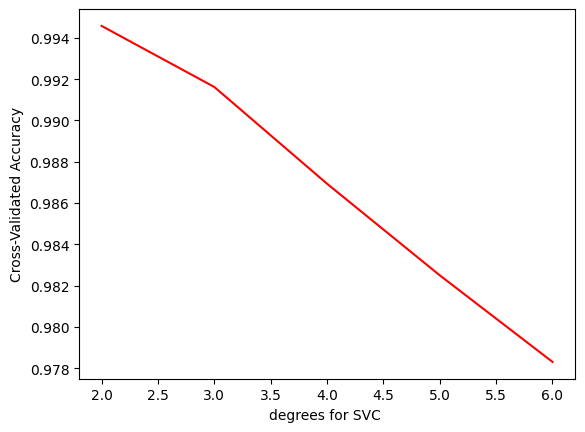

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Trouver les meilleures parametres

In [51]:
svm_model= SVC()

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

print(model_svm.best_params_)

y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9993421052631579
{'C': 0.8, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}
0.9990138067061144


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


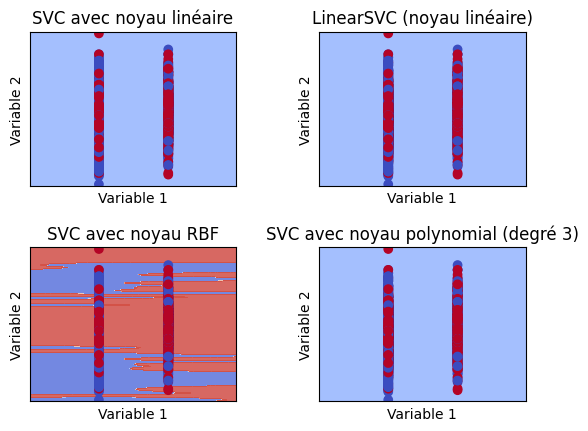

In [52]:
X = imputed_data.iloc[:, :2].values
y=imputed_data['DM']

h = .02

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC avec noyau linéaire',
          'LinearSVC (noyau linéaire)',
          'SVC avec noyau RBF',
          'SVC avec noyau polynomial (degré 3)']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

